# Pair IX 
# Ajuste 

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Librerías para la visualización de los datos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer la paleta de color de gráficas
# ==================================
qualitative_colors = sns.color_palette("Spectral")

#  Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#  Crossvalidation
# ------------------------------------------------------------------------------
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics

# Gestión de los warnings
# ======================
import warnings
warnings.filterwarnings('ignore')

- En el pair programming de hoy debéis usar el csv que guardastéis cuando hicistéis el pairprgramming de codificicación (este csv debería tener las variables estadandarizas).

- El objetivo de este pairprogramming es que hagáis vuestro primer modelo de machine learning. Para eso recordad que:

  - Deberéis separar la X y la y.

  - Deberéis crear el train y el test.

  - Ajustar vuestro modelo.


In [2]:
df = pd.read_pickle("../data/8_encoding.pkl")
df.sample(5)

,salario,cesta_compra,bebidas_super,bebidas_rest,comida_rest,ropa,deportes,cine,marlboro,educacion,transporte,gasolina,vehiculos,internet,movil,gastos_fijos,alquiler,m2,inte_fij_hipo,continente_oe
3040,8000.000,3.635143,2.3030,2.7708,26.666667,62.8700,29.033,9.396,12.790,2000.000,16.2900,1.820,30044.042,30.00,0.130,115.000,3537.5000,2859.143,4.34,5
1689,3758.000,5.589286,4.8075,3.8660,27.793333,60.1575,29.085,11.170,7.446,1042.340,18.1100,1.650,21281.085,60.80,0.480,149.220,2343.0925,8715.260,5.60,5
3302,1613.416,3.811143,2.7075,2.2236,24.686667,40.0000,40.119,8.000,6.000,526.108,15.0004,1.518,22182.210,80.00,0.164,244.058,722.2890,3796.435,5.12,5
199,420.280,2.348143,2.1775,0.9260,8.866667,29.8875,15.835,1.980,1.580,68.620,4.4820,1.030,22300.800,35.31,0.260,95.010,328.0800,264.545,8.50,1
4073,2453.920,4.466143,5.1990,3.8992,28.152667,53.3810,30.992,13.000,10.500,607.476,18.3828,1.406,22968.463,49.50,0.200,85.500,1450.0000,3690.100,3.59,5


In [3]:
df.duplicated().sum()

0

```Separamos la x de la y```

In [4]:
X = df.drop("salario", axis = 1)
y = df["salario"]

In [5]:
# Comprobemos que x son todas las columnas de las variables predictoras

X.head(3)

,cesta_compra,bebidas_super,bebidas_rest,comida_rest,ropa,deportes,cine,marlboro,educacion,transporte,gasolina,vehiculos,internet,movil,gastos_fijos,alquiler,m2,inte_fij_hipo,continente_oe
0,1.602857,3.5475,1.592,10.406667,37.7500,14.770,4.90,4.28,73.76,2.834,1.25,17607.475,7.96,0.01,57.37,319.8075,1844.180,7.96,2
1,3.862857,4.3575,2.022,17.230000,77.7925,38.950,8.38,3.49,1356.63,7.880,1.17,19957.900,16.74,0.03,64.76,1537.2925,13253.985,5.01,2
2,2.548571,6.5800,1.650,9.430000,54.5075,21.285,3.18,2.22,132.74,2.662,0.79,26734.235,30.45,0.11,80.12,613.7650,1981.745,9.15,2


In [6]:
# Comprobamos que y es el salario

y.head(3)

0     586.35
1    1382.83
2     483.19
Name: salario, dtype: float64

```Creamos el train y el test```

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

```Ajustamos el modelo```

- Ajustamos el modelo para el que el algoritmo aprenda de los datos de entrenamiento 

In [8]:
# Iniciamos la regresión lineal. n_jobs hace referencia al número de nucleos que usaremos de nuestro ordenador. Al indicar -1 significa que los usaremos todos. 

lr = LinearRegression(n_jobs=-1)

In [9]:
lr.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [10]:
y_predict_train = lr.predict(x_train) 
y_predict_test = lr.predict(x_test)

In [11]:
train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_predict_train, 'Set': ['Train']*len(y_train)})
test_df  = pd.DataFrame({'Real': y_test,  'Predicted': y_predict_test,  'Set': ['Test']*len(y_test)})
resultados = pd.concat([train_df,test_df], axis = 0)
resultados.head()

,Real,Predicted,Set
708,350.000,1144.525888,Train
2649,2495.786,2605.051066,Train
1451,184.340,635.073081,Train
4510,2729.396,3238.504048,Train
1691,1350.310,1553.634673,Train


In [12]:
resultados['residuos'] = resultados['Real'] - resultados['Predicted']
resultados.head()

,Real,Predicted,Set,residuos
708,350.000,1144.525888,Train,-794.525888
2649,2495.786,2605.051066,Train,-109.265066
1451,184.340,635.073081,Train,-450.733081
4510,2729.396,3238.504048,Train,-509.108048
1691,1350.310,1553.634673,Train,-203.324673


- En nuestro caso tenemos residuos positivos, el valor Y es mayor que el valor estimado por lo que se infravalora la variable (salario). Por otro lado también encontramos residuos negativos, el valor Y es menor que el valor estimado por lo tanto se sobrevalora la variable (salario).

''

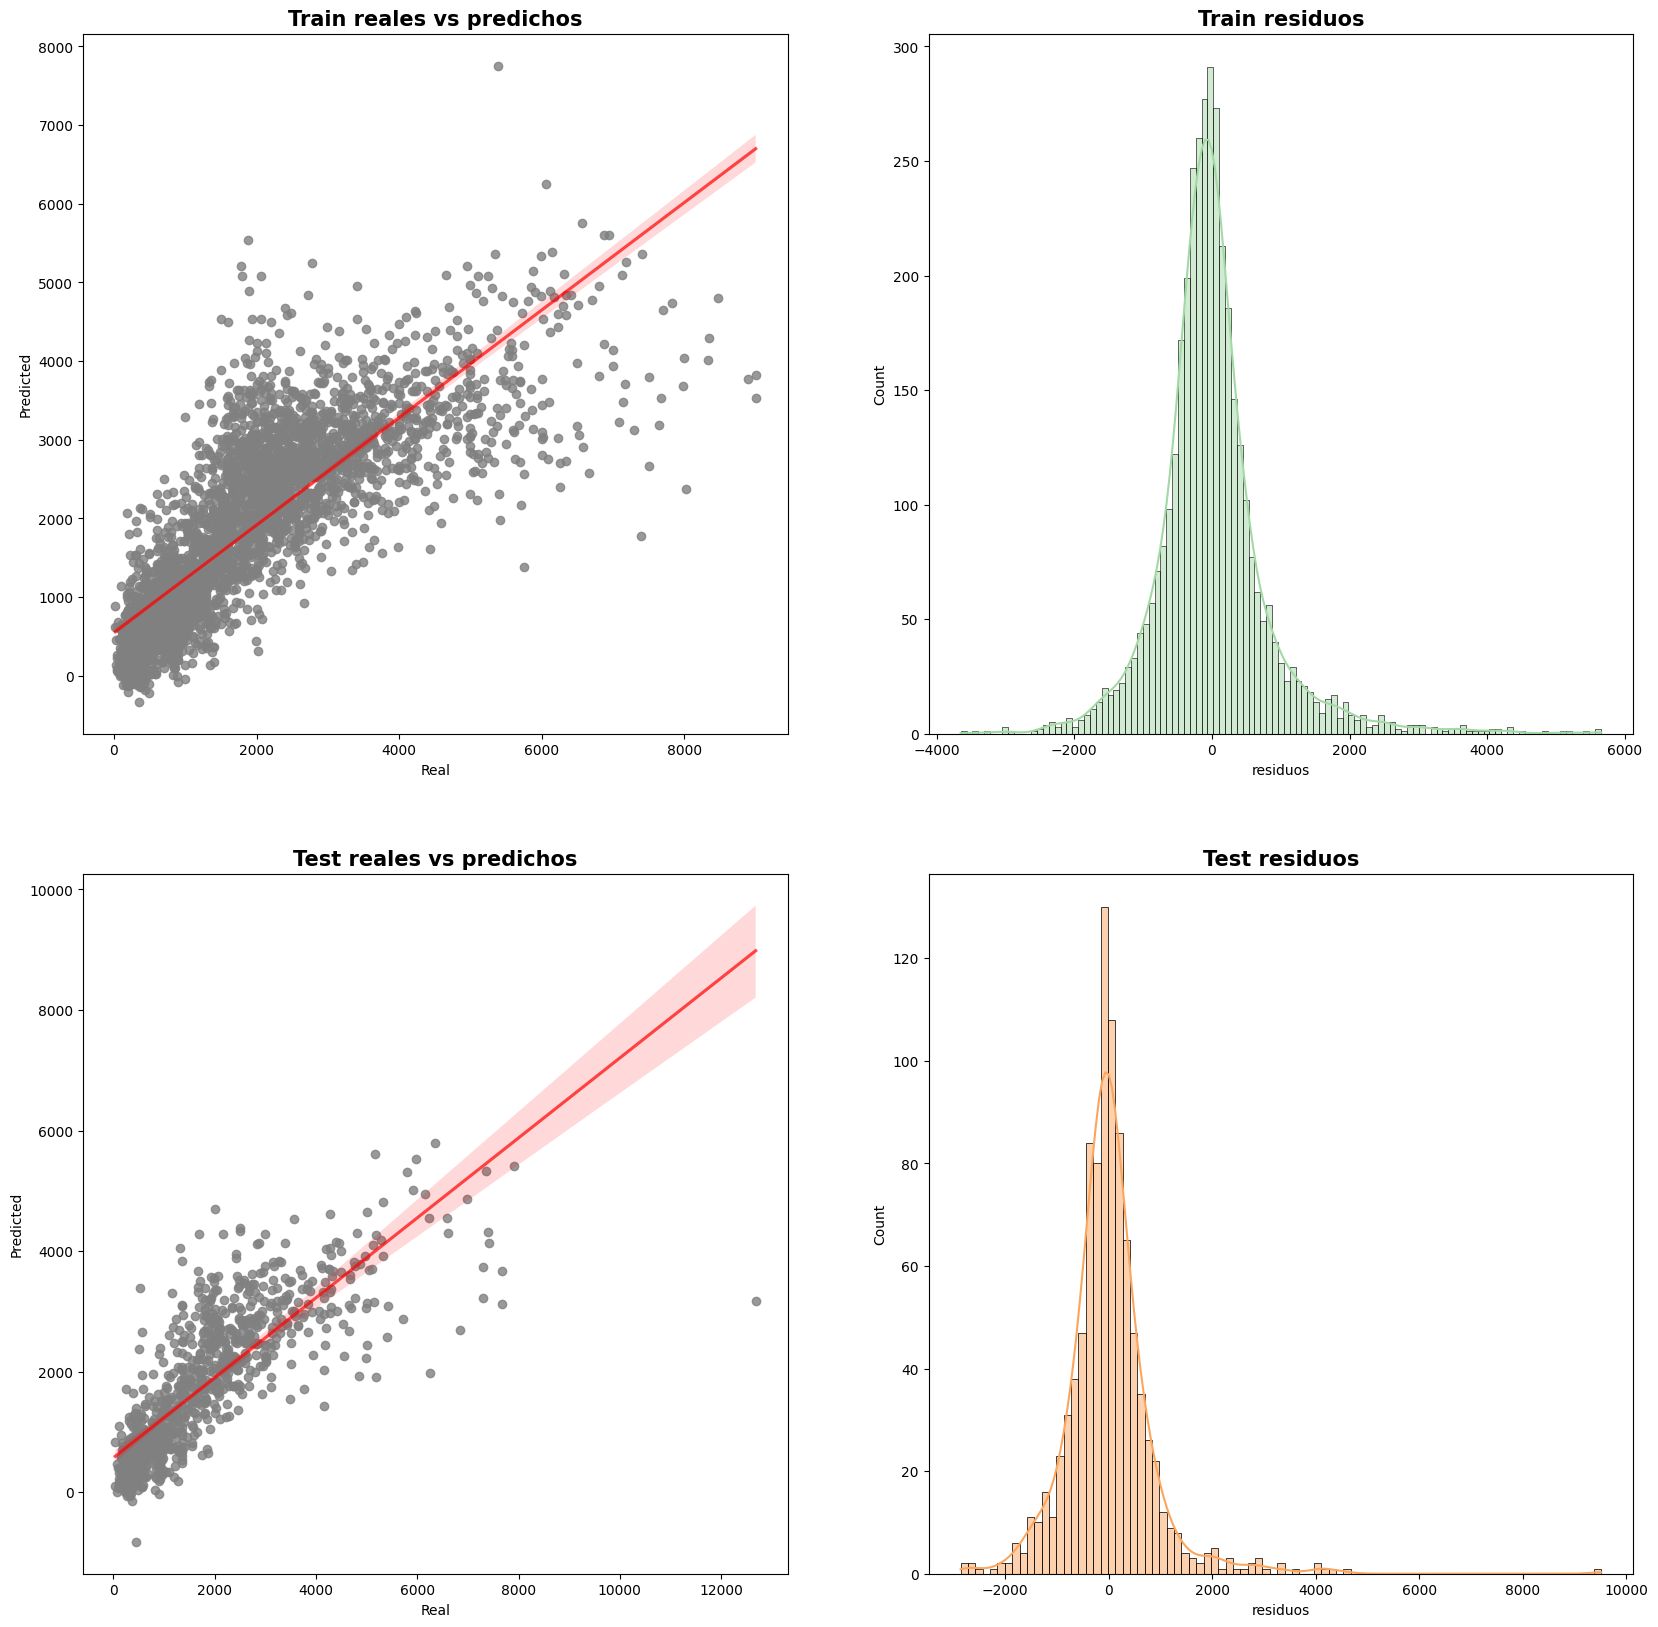

In [13]:
fig, ax = plt.subplots(2,2,figsize=(20,20))


# ploteamos los reales vs los predichos
sns.regplot(data = resultados[resultados['Set'] == "Train"], 
            x = "Real", 
            y = "Predicted", 
            ax = ax[0,0], 
            color = "grey",
            line_kws = {"color": "red", "alpha": 0.7 })


sns.regplot(data = resultados[resultados['Set'] == "Test"], 
            x = "Real",
            y = "Predicted", 
            color = "gray",
            line_kws = {"color": "red", "alpha": 0.7 }, 
            ax = ax[1,0])


# ploteamos los residuos
sns.histplot(resultados[resultados['Set'] == "Train"],
             x="residuos",
             color = qualitative_colors[4],
             kde=True, 
             ax = ax[0,1])


sns.histplot(resultados[resultados['Set'] == "Test"],
             x="residuos",
             color = qualitative_colors[1],
             kde=True, 
             ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold")
plt.savefig("../graficas/09_ajuste_regplot_histplot.png")
;

In [14]:
df.duplicated().sum()

0

In [15]:
df.to_pickle("../data/9_ajuste.pkl")